In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

False
1.75952705386 4.88757514961
False
0.049556374885 0.137656596903
False
-0.118074430152 -0.3279845282
False
-0.0875192955436 -0.243109154288
False
-0.0496136366298 -0.137815657305
False
-0.0244919454205 -0.0680331817236
False
-0.0104233642208 -0.0289537895023
False
-0.00329914618774 -0.00916429496594
False
-5.58863747813e-05 -0.000155239929948


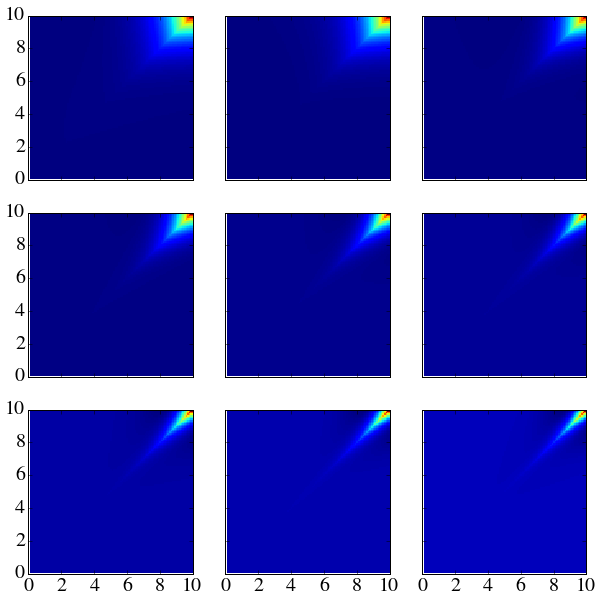

In [3]:
q = np.linspace(0.1,10,100)
#q = np.array([0.01+i*0.07 for i in range(201)])
#print q

lmax = 10
cosmo = Class()
Z = cosmo.compute_Zl_massive(q,lmax)

f, axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(10,10))
[Q, Qpr] = np.meshgrid(q,q)
l = 0
for i in range(3):
    for j in range(3):
        ax = axes[i][j]
        arr = Z[l].T*np.exp(Q)
        ax.pcolormesh(q,q,Z[l].T*np.exp(Q))
        print np.allclose(arr.T, arr)
        print arr[2,4],arr[4,2]
        l = l+1

In [6]:
import scipy
import scipy.linalg as la
def inu_dist(q):
    return np.exp(-q)

def weights(q):
    f0 = inu_dist(q)
    w = f0
    w[0] = w[0]*0.5*(q[1]-q[0])
    w[-1] = w[-1]*0.5*(q[-1]-q[-2])
    w[1:-1] = w[1:-1]*0.5*(q[2:]-q[:-2])
    return w
    
Nq = 15
q = np.linspace(0.1,15,Nq)



lmax = 2
cosmo = Class()
Z = cosmo.compute_Zl_massive(q,lmax)

C3term = -40./3*np.diag(q)
f0invmat = np.diag(1./inu_dist(q))
wmat = np.diag(weights(q))

for l in range(lmax+1):
    Zterm = np.dot(f0invmat,np.dot(Z[l],wmat))

    fullmat = C3term+Zterm
    L = la.eig(fullmat,right=False)
    print 'Eigenvalues, l='+str(l)+':',L[np.real(L)>0]
    #print 'Imaginarity, l='+str(l)+':',np.imag(L)/np.real(L)



Eigenvalues, l=0: [ 2.71888704+0.j  3.04709599+0.j]
Eigenvalues, l=1: [ 2.85725964+0.j]
Eigenvalues, l=2: []


In [7]:
def get_maxeigen(q,lmax = 10):
    cosmo = Class()
    Z = cosmo.compute_Zl_massive(q,lmax)
    C3term = -40./3*np.diag(q)
    f0invmat = np.diag(1./inu_dist(q))
    wmat = np.diag(weights(q))

    maxeigen = -10;
    for l in range(lmax+1):
        Zterm = np.dot(f0invmat,np.dot(Z[l],wmat))

        fullmat = C3term+Zterm
        L = la.eig(fullmat,right=False)
        reL = np.real(L)
        if np.max(reL)>maxeigen:
            maxeigen = np.max(reL)
    
    return maxeigen

In [69]:
def get_eigensubset(q,lmax = 10, numtop=4,numbot=1):
    cosmo = Class()
    Z = cosmo.compute_Zl_massive(q,lmax)
    C3term = -40./3*np.diag(q)
    f0invmat = np.diag(1./inu_dist(q))
    wmat = np.diag(weights(q))

    maxeigen = -10;
    res = []
    for l in range(lmax+1):
        Zterm = np.dot(f0invmat,np.dot(Z[l],wmat))

        fullmat = C3term+Zterm
        L = la.eig(fullmat,right=False)
        reL = np.sort(np.real(L))[::-1]
        res.append(np.append(reL[0:numtop],reL[-numbot:]))
        
    return res

a = 0.1
b = 15

#Nqvec = range(10,100,3)
Nqvec = np.logspace(1,4,30)

numtop = 5
numbot = 5

eigenNQ0 = np.zeros((numtop+numbot,len(Nqvec))) 
eigenNQ1 = np.zeros((numtop+numbot,len(Nqvec))) 
for idx,Nq in enumerate(Nqvec):
    q = np.linspace(a,b,Nq)
    res = get_eigensubset(q,lmax=2,numtop=numtop,numbot=numbot)
    eigenNQ0[:,idx] = res[0]
    eigenNQ1[:,idx] = res[1]
    
    




KeyboardInterrupt: 

In [75]:
Nqvec = np.logspace(1,4,30)
Nqvec = Nqvec[:-2]
eigenNQ0 = eigenNQ0[:,:-2]
eigenNQ1 = eigenNQ1[:,:-2]

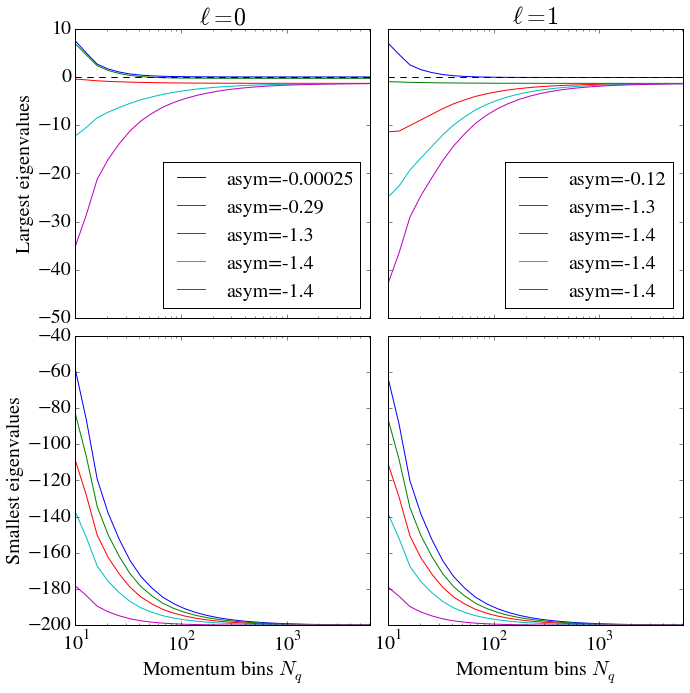

In [94]:
numtop=5
fig, axes = plt.subplots(2,2,sharex=True,sharey='row',figsize=(10,10))
topfactor = Nqvec**(0)*np.ones((numtop,1))
botfactor = Nqvec**(0)*np.ones((numbot,1))

axes[0,0].semilogx(Nqvec,eigenNQ0[:numtop,:].T)
axes[0,1].semilogx(Nqvec,eigenNQ1[:numtop,:].T)
for i in range(2):
    axes[0,i].axhline(0.,color='k',ls='--')
if True:
    axes[1,0].semilogx(Nqvec,(botfactor*eigenNQ0[-numbot:,:]).T)
    axes[1,1].semilogx(Nqvec,(botfactor*eigenNQ1[-numbot:,:]).T)
else:
    axes[1,0].semilogx(Nqvec,eigenNQ0[-numbot:,:].T)
    axes[1,1].semilogx(Nqvec,eigenNQ1[-numbot:,:].T)
    
axes[0,0].set_title(r'$\ell=0$')
axes[0,1].set_title(r'$\ell=1$')
axes[0,0].set_ylabel('Largest eigenvalues')
axes[1,0].set_ylabel('Smallest eigenvalues')
for ax in axes[-1,:]:
    ax.set_xlabel(r'Momentum bins $N_q$')
    ax.set_xlim([min(Nqvec),max(Nqvec)])
    
asyms = []
asyms.append(eigenNQ0[:numtop,-1])
asyms.append(eigenNQ1[:numtop,-1])
for i in range(2):
    axes[0,i].axhline(0.,color='k',ls='--')
    leg = ['asym='+"{:.2g}".format(val) for val in asyms[i]]
    axes[0,i].legend(leg,loc='lower right')
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.06,hspace=0.06)
fig.savefig('Eigenvalue_asymptotes1.pdf')

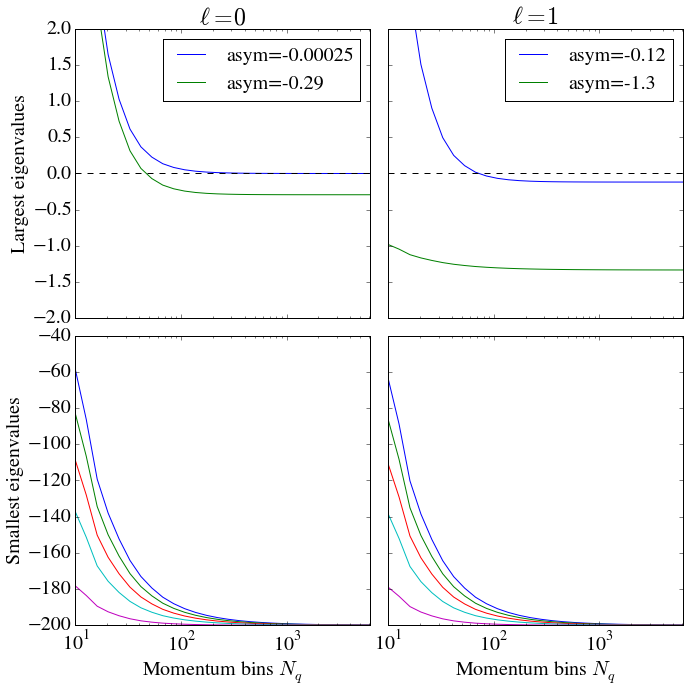

In [99]:
numtop=2
fig, axes = plt.subplots(2,2,sharex=True,sharey='row',figsize=(10,10))
axes[0,0].semilogx(Nqvec,eigenNQ0[:numtop,:].T)
axes[0,1].semilogx(Nqvec,eigenNQ1[:numtop,:].T)
axes[1,0].semilogx(Nqvec,eigenNQ0[-numbot:,:].T)
axes[1,1].semilogx(Nqvec,eigenNQ1[-numbot:,:].T)

asyms = []
asyms.append(eigenNQ0[:numtop,-1])
asyms.append(eigenNQ1[:numtop,-1])
for i in range(2):
    axes[0,i].axhline(0.,color='k',ls='--')
    leg = ['asym='+"{:.2g}".format(val) for val in asyms[i]]
    axes[0,i].legend(leg)


axes[0,0].set_ylim([-2,2])
    
axes[0,0].set_title(r'$\ell=0$')
axes[0,1].set_title(r'$\ell=1$')
axes[0,0].set_ylabel('Largest eigenvalues')
axes[1,0].set_ylabel('Smallest eigenvalues')

for ax in axes[-1,:]:
    ax.set_xlabel(r'Momentum bins $N_q$')
    ax.set_xlim([min(Nqvec),max(Nqvec)])
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.06,hspace=0.06)
fig.savefig('Eigenvalue_asymptotes2.pdf')

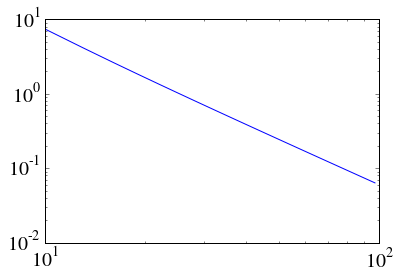

In [55]:
Nq = 10
a = 0.1
b = 15

Nqvec = range(10,100,3)
eigenNQ = []
for Nq in Nqvec:
    q = np.linspace(a,b,Nq)
    eigenNQ.append(get_maxeigen(q))

plt.loglog(Nqvec,eigenNQ)

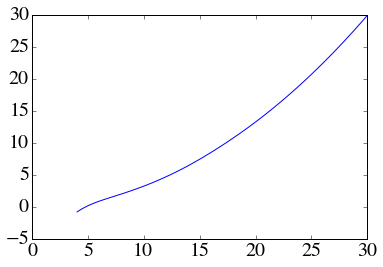

In [80]:
Nq = 10
a = 0.1
b = 15

bvec = np.linspace(4,30,100)
eigenB = []
for b in bvec:
    q = np.linspace(a,b,Nq)
    eigenB.append(get_maxeigen(q))

plt.plot(bvec,eigenB)

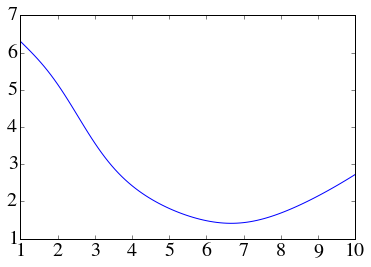

In [120]:
Nq = 20
a = 0.1
b = 15

cvec = np.linspace(1,10,100)
eigenC = []
for c in cvec:
    q = np.linspace(a,c,Nq/2)
    q = np.append(q,np.linspace(c,b,Nq/2))
    eigenC.append(get_maxeigen(q))

plt.plot(cvec,eigenC)

In [108]:
import scipy.integrate
import scipy.optimize
def integrand(q):
    return q**2*inu_dist(q)
def fzerofun(q,rhs):
    return scipy.integrate.quad(integrand,a,q)[0]-rhs
a = 0.1
b = 15
ntot = scipy.integrate.quad(integrand,a,b)[0]
Nq = 20
nvec = np.linspace(0,ntot,Nq)
q = np.zeros((Nq))
q[0] = a
q[-1] = b
for i in range(1,Nq-1):
    q[i] = scipy.optimize.brentq(fzerofun,a,b,nvec[i])
    
print q
print get_maxeigen(q)

print get_maxeigen(np.linspace(a,b,Nq))


[  0.1          0.83625351   1.12853881   1.36462123   1.57670801
   1.77712517   1.97250835   2.16729512   2.36501827   2.56894652
   2.78251671   3.00974532   3.25575786   3.52762723   3.83590788
   4.19783277   4.64509744   5.24768277   6.22473805  15.        ]
75.3576145808
1.64255283951


45 [  0.55405279   0.59300621   0.66512675   0.68735506   0.76188155
   0.82297781   0.92015256   1.05616721   1.05705935   1.09738024
   1.14851082   1.2093498    1.2106577    1.21387462   1.25161453
   1.27492378   1.50267004   1.51206791   1.51728545   1.65433457
   1.66800027   1.73148039   1.7425957    1.74742531   1.77566735
   1.79133412   1.81193969   1.8276656    1.9167909    1.96896884
   2.02039092   2.18885805   2.30002766   2.36048869   2.41426716
   2.48344022   2.50305443   2.53353428   2.54008965   2.66528558
   2.84088459   2.84936891   2.89741135   3.11847903   3.18566526
   3.45095162   3.47806778   3.48162636   3.5817457    3.62102057
   3.63460152   3.71709654   3.82545337   3.84461217   3.85405798
   3.86422046   3.90034565   4.23029316   4.2935648    4.31174138
   4.41634137   4.51617287   4.53847871   4.64320811   4.68000446
   4.70458416   4.72010167   4.76693529   4.80895762   4.8290861
   4.90659031   4.94812536   5.24845781   5.36179971   5.39096838
   5.662

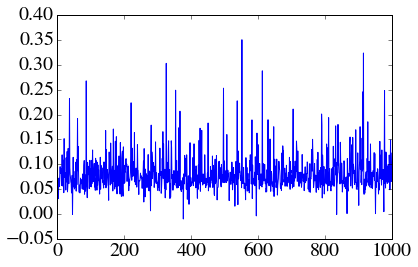

In [149]:
import scipy
Nq = 200
a = 0.1
b = 15

seeds = range(1000)
eigenS = []
for s in seeds:
    scipy.random.seed(s)
    q = np.sort(scipy.rand(Nq)*(b-a)+a)
    eigenS.append(get_maxeigen(q,lmax=2))
    if eigenS[-1]<0:
        print s, q

plt.plot(seeds,eigenS)

0.554052788638
0.578068141237
0.570631636147
0.41981521259
5.99870864798 5.99278152117 0.000988067124297
5.99870864798 5.99278152117 0.000988067124297
5.99870864798 6.77229600845 0.128958981985


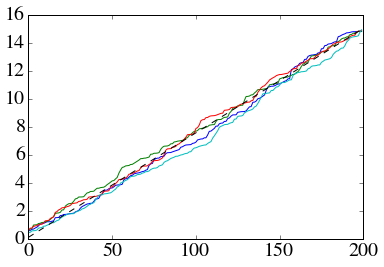

In [152]:
svec = [45, 376, 594, 834]
Nq = 200
a = 0.1
b = 15


for s in svec:
    scipy.random.seed(s)
    q = np.sort(scipy.rand(Nq)*(b-a)+a)
    plt.plot(range(len(q)),q)
    print np.min(q)
plt.plot(range(Nq),np.linspace(a,b,Nq),'k--')

#nvec = [scipy.integrate.quad(integrand,a,qq)[0] for qq in q]
w = weights(q)
def indefinteg(q):
    return np.exp(-q)*(-6-q*(6+q*(3+q)))

Iexact = indefinteg(b)-indefinteg(a)
Inum = np.sum(w*q**3)
Inum2 = np.trapz(np.exp(-q)*q**3,q)
Inum3 = np.mean(np.exp(-q)*q**3)*(b-a)

print Iexact,Inum,np.abs(1-Inum/Iexact)
print Iexact,Inum2,np.abs(1-Inum2/Iexact)
print Iexact,Inum3,np.abs(1-Inum3/Iexact)


In [187]:
#qbase = np.arange(0.5,15)
Nq = 100
qbase = np.linspace(0.5,15,Nq)
def minifun(delq):
    q = qbase.copy()
    q[1:-1]+=delq
    q = np.sort(abs(q))
    eigenval = get_maxeigen(q)
    #print q[0],q[-1],eigenval
    return eigenval

a = 0.1
b = 15
delq = np.zeros((len(qbase)-2))

opt = scipy.optimize.minimize(minifun,delq,bounds=[(-3,3)]*(len(qbase)-2))
print opt

KeyboardInterrupt: 

[  0.5          0.75754249   0.99311254   1.23158493   1.46493612
   1.70809451   1.95211123   2.20431683   2.45761255   2.70277123
   2.95133857   3.19416735   3.43733068   3.68538751   3.93209974
   4.18576962   4.42151155   4.65828823   4.92240824   5.16558407
   5.41479823   5.66067523   5.89608699   6.13189494   6.37179657
   6.62661702   6.87473986   7.12391708   7.3747974    7.61789912
   7.86478093   8.11603037   8.35852455   8.61453644   8.84893247
   9.09562335   9.34262103   9.58954822   9.8357264   10.08171771
  10.32701486  10.57412302  10.82041143  11.0673159   11.3120064
  11.55843726  11.80245029  12.04959243  12.29544035  12.54209891
  12.78688634  13.03324319  13.27863014  13.52489826  13.77092718
  14.01647573  14.2624974   14.50808371  14.75409862  15.        ]


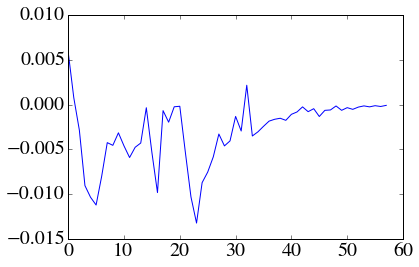

In [186]:
q =qbase
q[1:-1] += opt.x
print np.sort(abs(q))
plt.plot(opt.x)



In [37]:
a = np.array([1,2,4,7])
print a.shape
print a*np.ones((4,1))


(4,)
[[ 1.  2.  4.  7.]
 [ 1.  2.  4.  7.]
 [ 1.  2.  4.  7.]
 [ 1.  2.  4.  7.]]


In [163]:
[(-0.5,0.5)]*10

[(-0.5, 0.5),
 (-0.5, 0.5),
 (-0.5, 0.5),
 (-0.5, 0.5),
 (-0.5, 0.5),
 (-0.5, 0.5),
 (-0.5, 0.5),
 (-0.5, 0.5),
 (-0.5, 0.5),
 (-0.5, 0.5)]

In [42]:
np.log10(2000)

3.3010299956639813

In [57]:
a = np.array([0,1,2,3,4])
print a
print a[::-1]

[0 1 2 3 4]
[4 3 2 1 0]
